<a href="https://colab.research.google.com/github/avanegasp/Alura/blob/main/Modulo5_PRAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [267]:
viviendas = pd.read_csv('https://raw.githubusercontent.com/avanegasp/Alura/main/inmuebles_bogota.csv')

In [268]:
#Creo una copia independiente de viviendas
copia_ind_viviendas = viviendas.copy()

In [269]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [270]:
viviendas.describe()

,Habitaciones,Baños,Área
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


In [271]:
viviendas.describe(include='object')

,Tipo,Descripcion,Barrio,UPZ,Valor
count,9520,9520,9520,9478,9520
unique,8,316,149,63,1039
top,Apartamento,Apartamento en venta en Usaquén,Usaquén,Usaquén,$ 450.000.000
freq,7327,916,1105,1681,128


In [272]:
#Cambio el nombre de las columnas Baños y Área

columnas = {'Baños' : 'Banos', 'Área': 'Area'}
viviendas = viviendas.rename(columns = columnas)

In [273]:
#Verificar que queden bien los nombres con los cambios
viviendas.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

In [274]:
viviendas.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
7171,Apartamento,Apartamento en venta en Madelena,3,2,53,Madelena,Arborizadora,$ 200.000.000
4242,Casa,Casa en venta en Las Ferias,11,6,320,Las Ferias,ENGATIVÁ: Santa Cecilia + Jardín Botánico,$ 550.000.000
2623,Casa,Casa en venta en Cedritos,3,3,158,Cedritos,Usaquén,$ 650.000.000
5656,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,88,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 500.000.000
5689,Apartamento,Apartamento en venta en El Retiro,4,4,223,El Retiro,CHAPINERO: Chicó Lago + El Refugio,$ 1.500.000.000


In [275]:
round(viviendas.Area.mean(),2)

146.66

In [276]:
# Cúantos barrios tengo con sus viviendas hay a la venta

viviendas[['Barrio', 'Tipo']].value_counts()

Barrio              Tipo       
Usaquén             Apartamento    921
Zona Noroccidental  Apartamento    635
Cedritos            Apartamento    502
Bosa                Apartamento    499
Santa Barbara       Apartamento    393
                                  ... 
Prado Veraniego     Apartamento      1
El Refugio          Casa             1
                    Local            1
Pinar De Suba       Casa             1
Alameda             Apartamento      1
Length: 303, dtype: int64

In [277]:
# UPZ hay 119 en Bogotá, acá hay en más del 50% venta de viviendas
unique_upz_count = len(viviendas.UPZ.unique())

print("Número de UPZ únicas:", unique_upz_count)

Número de UPZ únicas: 64


## Imputaciones de la UPZ

## Cantidad de viviendas a la venta en Bogotá

<Axes: >

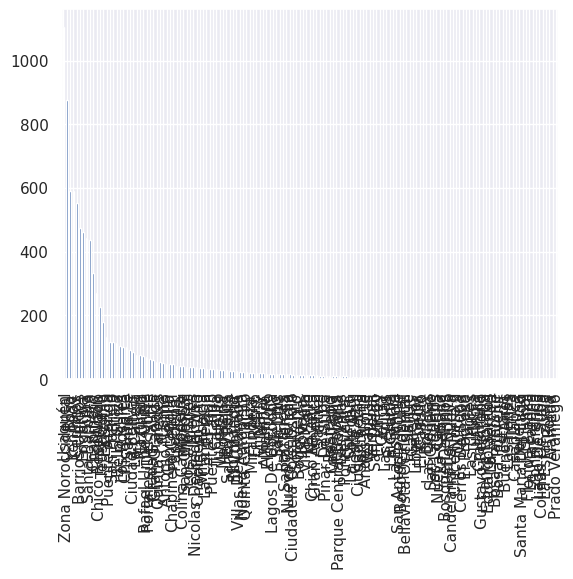

In [278]:
viviendas.Barrio.value_counts().plot(kind='bar')

### Top 10 barrios con más vivienda para ventas en Bogotá

<Axes: >

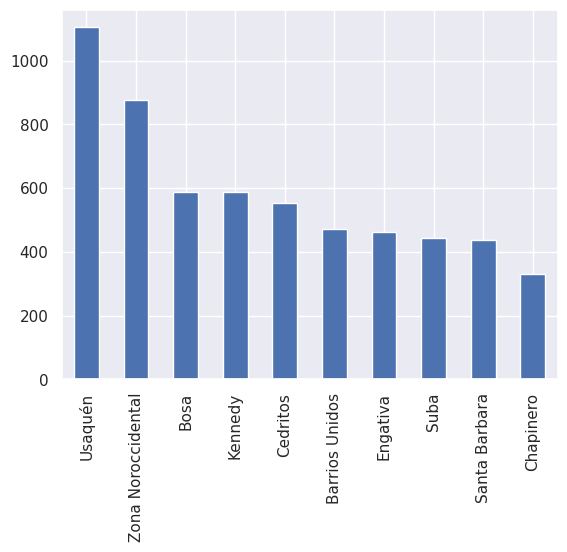

In [279]:
viviendas_barrio = viviendas.Barrio.value_counts()
viviendas_barrio.head(10).plot.bar()

### Top 10 de los Barrios por Área en Bogotá

<Axes: xlabel='Barrio'>

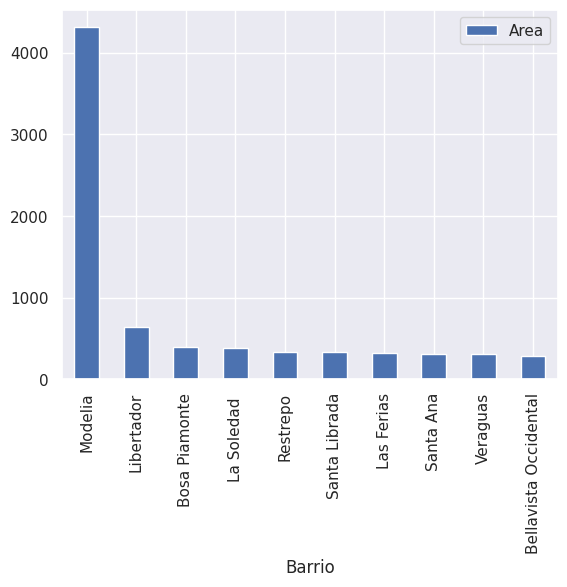

In [280]:
# Promedio de área de todos las viviendas en los barrios en el dataset. El top 10.
viviendas[['Barrio','Area']].groupby(['Barrio']).mean().sort_values(by=['Area'],
        ascending=False).head(10).plot(kind='bar')

### Metro Cuadrado por Barrio

Valor de la vivienda / Área

In [281]:
#La columna valor está en string
type(viviendas.Valor[0])

str

In [282]:
#Dividimos la columna valor en 2 columnas
valor = viviendas.Valor.str.split(expand=True)
valor

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


In [283]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [284]:
viviendas.Valor[1]+viviendas.Valor[2]

'$ 670.000.000$ 1.120.000.000'

In [285]:
viviendas['Pesos'] = valor[0]
viviendas['Precio'] = valor[1]

viviendas.sample(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio
4110,Casa,Casa en venta en Santa Barbara,1,2,58,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 419.600.000,$,419.600.000
7706,Apartamento,Apartamento en venta en Puente Largo,3,3,142,Puente Largo,La Alhambra,$ 560.000.000,$,560.000.000


In [286]:
viviendas.Precio[1]+viviendas.Precio[2]

'670.000.0001.120.000.000'

In [287]:
#Se elimina el punto de millar en el valor
viviendas['Precio'] = viviendas['Precio'].str.replace('.','',regex=True)

In [288]:
type(viviendas.Precio[1])

str

In [289]:
#Se crea una nueva columna y se eliminan 6 ceros
viviendas['Precio_Final'] = viviendas['Precio'].astype('float')/1000000

In [290]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Banos         9520 non-null   int64  
 4   Area          9520 non-null   int64  
 5   Barrio        9520 non-null   object 
 6   UPZ           9478 non-null   object 
 7   Valor         9520 non-null   object 
 8   Pesos         9520 non-null   object 
 9   Precio        9520 non-null   object 
 10  Precio_Final  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [291]:
viviendas.Precio_Final

0        360.00
1        670.00
2       1120.00
3        890.00
4        970.00
         ...   
9515     290.00
9516     670.00
9517     900.00
9518     335.00
9519     144.99
Name: Precio_Final, Length: 9520, dtype: float64

### Detección de outliers

In [292]:
viviendas.describe()

,Habitaciones,Banos,Area,Precio_Final
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


En este describe se puede notar que hay una dato con 110 habitaciones y otro con Precio_Final de 16000 millones de pesos.

In [293]:
viviendas.loc[viviendas.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.0


<Axes: xlabel='Habitaciones'>

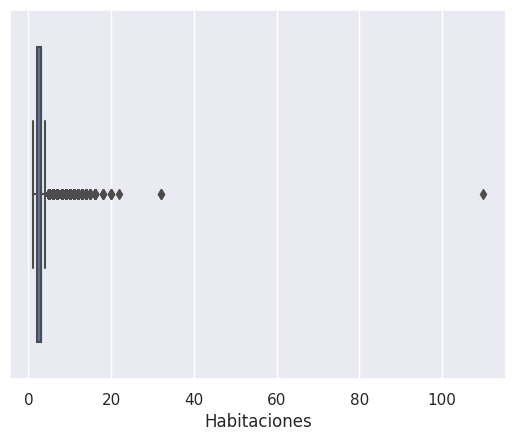

In [294]:
sns.boxplot(data=viviendas, x='Habitaciones')

In [295]:
viviendas.loc[viviendas.Precio_Final == 16000]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final
5234,Edificio,Edificio en venta en Usaquén,12,7,1664,Usaquén,Usaquén,$ 16.000.000.000,$,16000000000,16000.0


<Axes: xlabel='Precio_Final'>

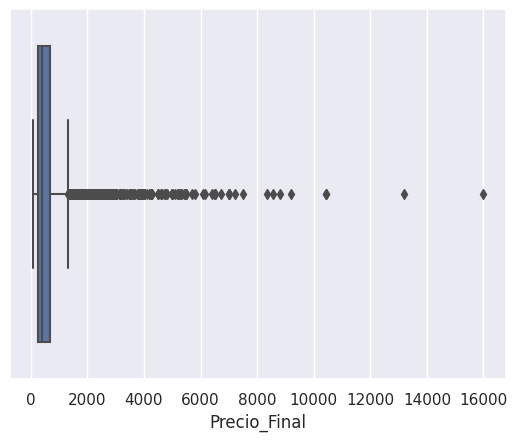

In [296]:
sns.boxplot(data=viviendas, x='Precio_Final')

In [297]:
viviendas.loc[viviendas['Banos'] == 0]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000,$,9200000000,9200.0
8193,Casa,Casa en venta en Puente Aranda,15,0,450,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.000.000.000,$,1000000000,1000.0
9451,Casa,Casa en venta en Bosa,10,0,540,Bosa,Bosa Central,$ 800.000.000,$,800000000,800.0


<Axes: xlabel='Banos'>

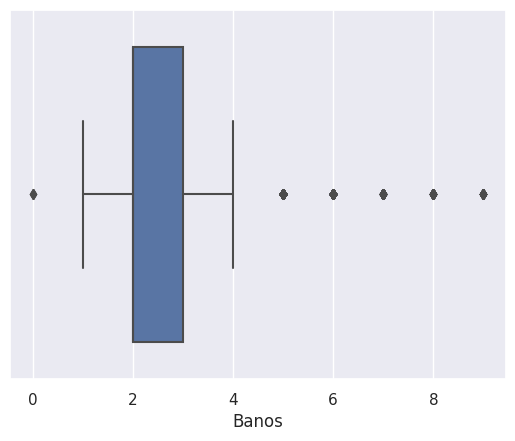

In [298]:
sns.boxplot(data=viviendas, x='Banos')

In [299]:
viviendas.loc[viviendas.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.0


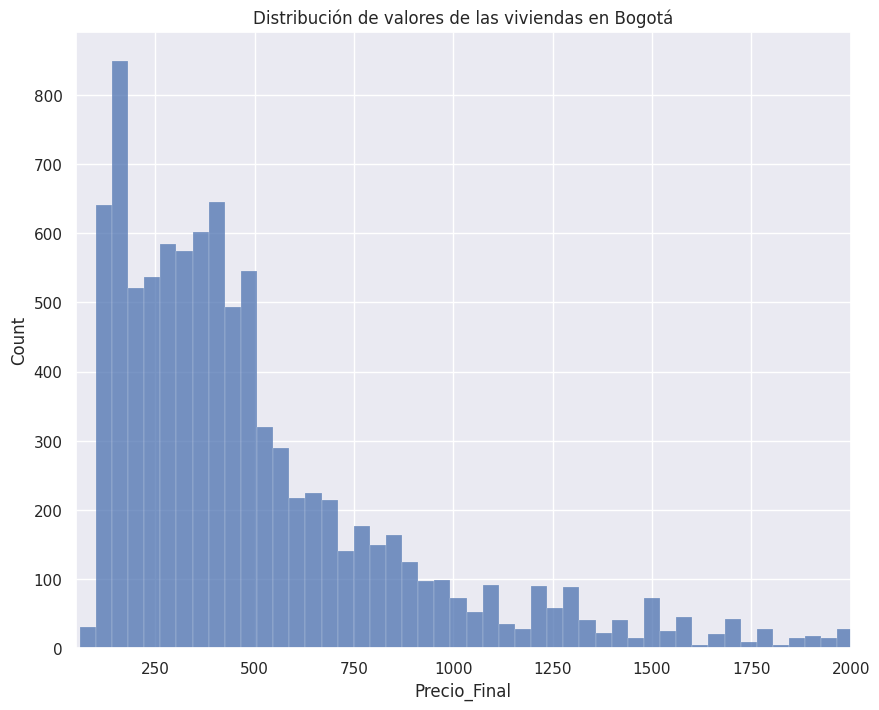

In [300]:
plt.figure(figsize=(10,8))
graphic = sns.histplot(data=viviendas, x='Precio_Final')
graphic.set_title('Distribución de valores de las viviendas en Bogotá')
#Se establece los valores min y max que se vió en el describe
plt.xlim(50,2000)
plt.show()

En el describe se puede notar que el 75% de los datos tienen un valor máximo de precio final de 680 millones de pesos por este motivo se ajusta la gráfica a 1000 millones

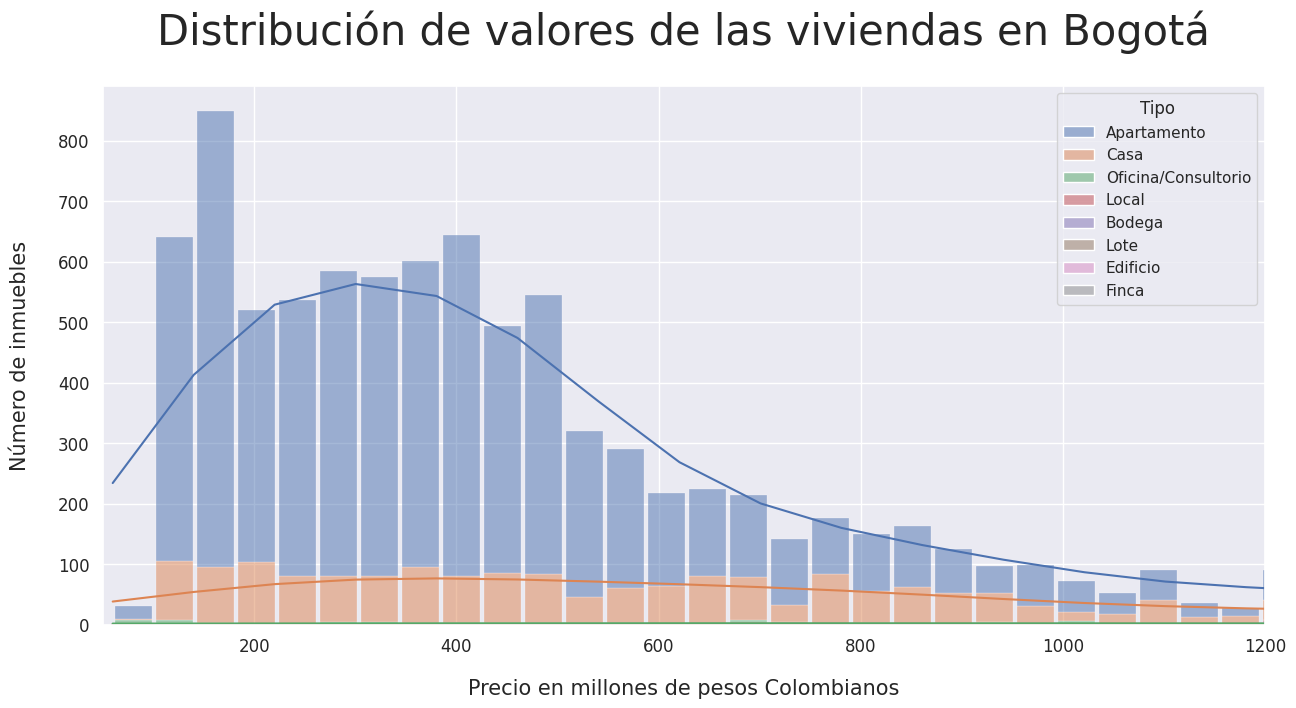

In [301]:
#viviendas_principal = ['Apartamento','Finca', 'Oficina/Consultorio']
#viviendas_filtradas = viviendas[viviendas['Tipo'].isin(viviendas_principal)]

# Se crea el gráfico con los datos filtrados
plt.figure(figsize=(15, 7))
graphic = sns.histplot(data=viviendas, x='Precio_Final', kde=True, hue='Tipo', shrink=0.9, multiple='stack')
plt.title('Distribución de valores de las viviendas en Bogotá',pad=30, fontsize=30)
plt.ylabel('Número de inmuebles', labelpad=20, fontsize = 15)
plt.xlabel('Precio en millones de pesos Colombianos', labelpad=16, fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(50, 1200)

plt.show()

### Viviendas Filtradas

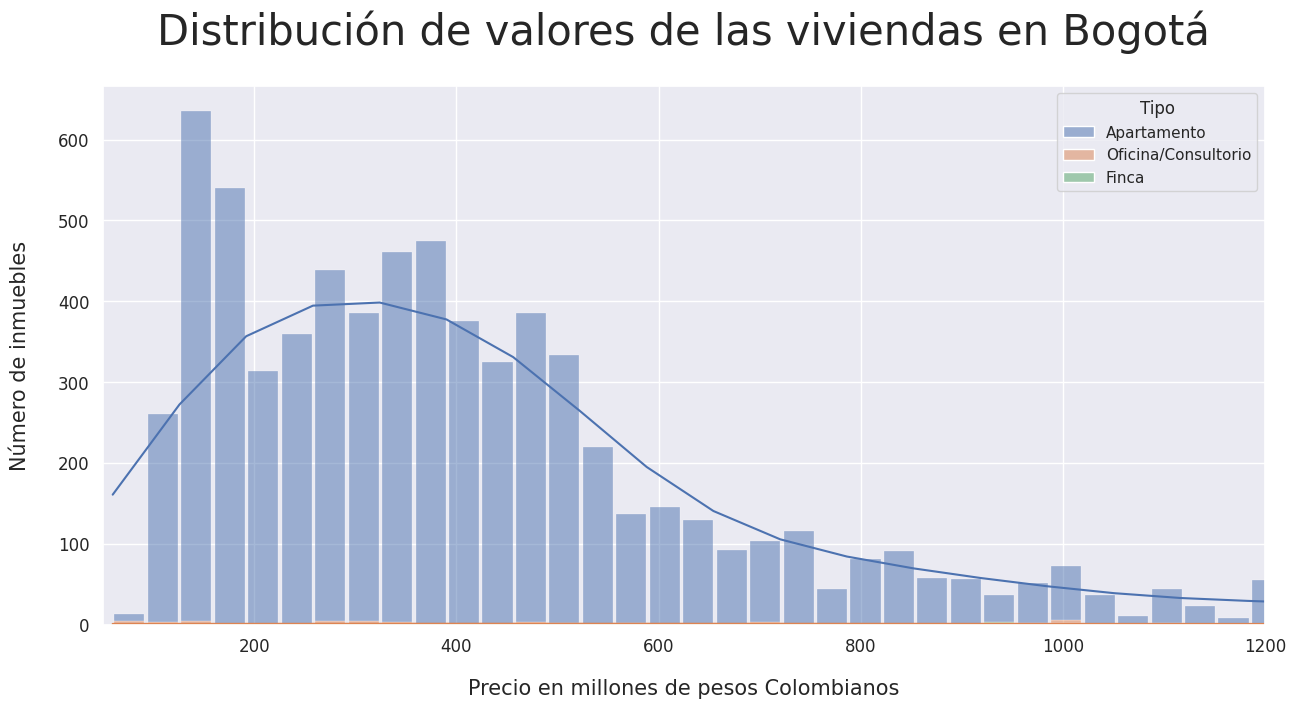

In [302]:
viviendas_principal = ['Apartamento','Finca', 'Oficina/Consultorio']
viviendas_filtradas = viviendas[viviendas['Tipo'].isin(viviendas_principal)]

# Se crea el gráfico con los datos filtrados
plt.figure(figsize=(15, 7))
graphic = sns.histplot(data=viviendas_filtradas, x='Precio_Final', kde=True, hue='Tipo', shrink=0.9, multiple='stack')
plt.title('Distribución de valores de las viviendas en Bogotá',pad=30, fontsize=30)
plt.ylabel('Número de inmuebles', labelpad=20, fontsize = 15)
plt.xlabel('Precio en millones de pesos Colombianos', labelpad=16, fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(50, 1200)

plt.show()

In [303]:
viviendas.Tipo.value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

In [304]:
viviendas.loc[viviendas['Tipo']=='Apartamento'].head(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.0
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.0


### Precio del metro cuadrado por UPZ

In [305]:
#Se agrega la columna 'Precio Cuadrado'
viviendas['Precio_Cuadrado_UPZ'] = round(viviendas['Precio_Final']/viviendas['Area'],2)

In [306]:
viviendas.sample(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final,Precio_Cuadrado_UPZ
910,Casa,Casa en venta en La Estancia,3,2,63,La Estancia,CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El M...,$ 168.000.000,$,168000000,168.00,2.67
970,Apartamento,Apartamento en venta en Teusaquillo,1,1,29,Teusaquillo,Teusaquillo,$ 190.080.000,$,190080000,190.08,6.55


In [307]:
# Filtrar los 10 primeros barrios
M2_barrio = viviendas['Barrio'].value_counts().head(10).index.tolist()

# Crear un nuevo DataFrame solo con los 10 primeros barrios
viviendas_top_10 = viviendas[viviendas['Barrio'].isin(M2_barrio)]

# Calcular el área cuadrada de esos barrios
area_cuadrada_total = viviendas_top_10.groupby('Barrio')['Precio_Cuadrado_UPZ'].mean().reset_index()

# Ordenar el DataFrame area_cuadrada_total de mayor a menor por el área cuadrada total
area_cuadrada_total = area_cuadrada_total.sort_values(by='Precio_Cuadrado_UPZ', ascending=False)

# Mostrar el área cuadrada total de los 10 primeros barrios
print(area_cuadrada_total)

               Barrio  Precio_Cuadrado_UPZ
3           Chapinero             7.427620
6       Santa Barbara             6.168676
8             Usaquén             5.732090
2            Cedritos             5.150343
9  Zona Noroccidental             4.617092
7                Suba             4.516388
0      Barrios Unidos             4.377315
4            Engativa             3.886970
5             Kennedy             3.612479
1                Bosa             2.808778


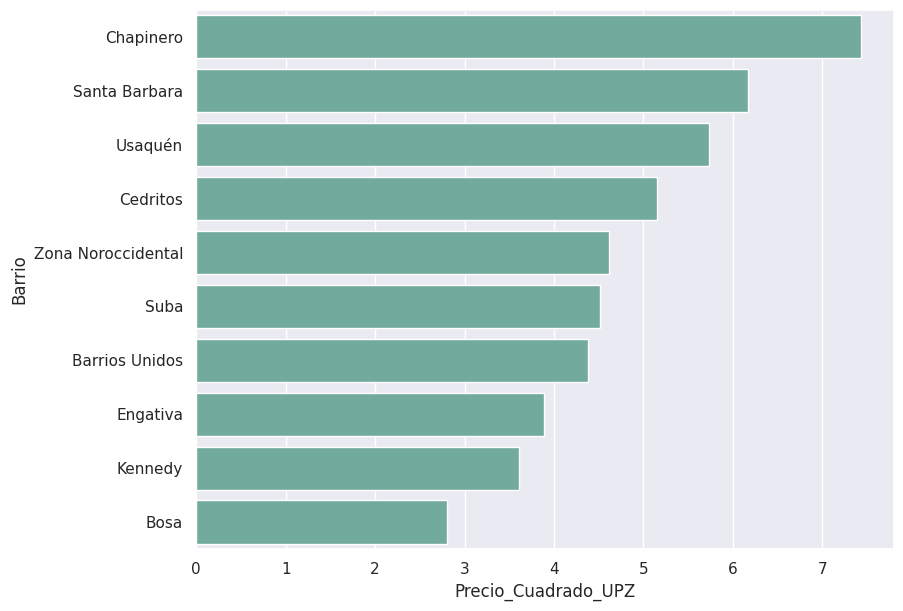

In [308]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(9, 7))

# plot a bar chart
sns.barplot(
    x="Precio_Cuadrado_UPZ",
    y="Barrio",
    data=area_cuadrada_total,
    estimator=sum,
    errorbar=None,
    color='#69b3a2');

plt.show()

### Precio Cuadrado por Barrio


In [309]:
barrios_unidos = viviendas.loc[viviendas['Barrio']=='Barrios Unidos']
barrios_unidos

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final,Precio_Cuadrado_UPZ
29,Apartamento,Apartamento en venta en Barrios Unidos,3,2,67,Barrios Unidos,Los Andes,$ 445.000.000,$,445000000,445.0,6.64
449,Casa,Casa en venta en Barrios Unidos,3,3,230,Barrios Unidos,Los Andes,$ 990.000.000,$,990000000,990.0,4.30
525,Apartamento,Apartamento en venta en Barrios Unidos,3,2,43,Barrios Unidos,Los Andes,$ 160.000.000,$,160000000,160.0,3.72
627,Apartamento,Apartamento en venta en Barrios Unidos,3,2,89,Barrios Unidos,Los Andes,$ 460.000.000,$,460000000,460.0,5.17
746,Apartamento,Apartamento en venta en Barrios Unidos,3,2,72,Barrios Unidos,Los Andes,$ 280.000.000,$,280000000,280.0,3.89
...,...,...,...,...,...,...,...,...,...,...,...,...
9281,Apartamento,Apartamento en venta en Barrios Unidos,3,2,98,Barrios Unidos,Los Andes,$ 430.000.000,$,430000000,430.0,4.39
9296,Apartamento,Apartamento en venta en Barrios Unidos,3,2,58,Barrios Unidos,Los Andes,$ 305.000.000,$,305000000,305.0,5.26
9327,Apartamento,Apartamento en venta en Barrios Unidos,2,2,78,Barrios Unidos,Los Andes,$ 375.000.000,$,375000000,375.0,4.81
9493,Casa,Casa en venta en Barrios Unidos,8,6,247,Barrios Unidos,Los Andes,$ 690.000.000,$,690000000,690.0,2.79


In [310]:
viviendas.groupby('Barrio').mean()

<ipython-input-310-d5738af233f5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  viviendas.groupby('Barrio').mean()


,Habitaciones,Banos,Area,Precio_Final,Precio_Cuadrado_UPZ
Barrio,,,,,
Alameda,3.000000,2.000000,97.000000,580.000000,5.980000
Alhambra,3.000000,2.941176,190.411765,752.352941,4.327647
Andes Norte,3.000000,2.857143,124.857143,709.571429,6.050000
Antonio Nariño,4.312500,2.500000,163.062500,459.221875,3.530208
Barrancas,2.866667,2.133333,70.200000,314.133333,4.416667
...,...,...,...,...,...
Villa Maria,4.692308,3.692308,207.153846,402.846154,2.046154
Villas De Granada,3.454545,2.318182,86.590909,282.301136,3.169545
Villemar,2.944444,2.055556,76.888889,303.833333,3.988889


In [311]:
sum_barrio = viviendas.groupby('Barrio').sum()
sum_barrio

<ipython-input-311-41e81a26ec75>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_barrio = viviendas.groupby('Barrio').sum()


,Habitaciones,Banos,Area,Precio_Final,Precio_Cuadrado_UPZ
Barrio,,,,,
Alameda,3,2,97,580.000000,5.98
Alhambra,51,50,3237,12790.000000,73.57
Andes Norte,21,20,874,4967.000000,42.35
Antonio Nariño,207,120,7827,22042.650000,169.45
Barrancas,43,32,1053,4712.000000,66.25
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.000000,26.60
Villas De Granada,76,51,1905,6210.625000,69.73
Villemar,53,37,1384,5469.000000,71.80


In [312]:
sum_barrio['Precio_M2_Barrio'] = round(sum_barrio['Precio_Final']/sum_barrio['Area'],3)
sum_barrio

,Habitaciones,Banos,Area,Precio_Final,Precio_Cuadrado_UPZ,Precio_M2_Barrio
Barrio,,,,,,
Alameda,3,2,97,580.000000,5.98,5.979
Alhambra,51,50,3237,12790.000000,73.57,3.951
Andes Norte,21,20,874,4967.000000,42.35,5.683
Antonio Nariño,207,120,7827,22042.650000,169.45,2.816
Barrancas,43,32,1053,4712.000000,66.25,4.475
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.000000,26.60,1.945
Villas De Granada,76,51,1905,6210.625000,69.73,3.260
Villemar,53,37,1384,5469.000000,71.80,3.952


In [313]:
# Para agregar la columna nueva a nuestro DF viviendas, lo transformo en un diccionario

m2_barrio = dict(sum_barrio['Precio_M2_Barrio'])
m2_barrio

{'Alameda': 5.979,
 'Alhambra': 3.951,
 'Andes Norte': 5.683,
 'Antonio Nariño': 2.816,
 'Barrancas': 4.475,
 'Barrios Unidos': 2.96,
 'Bella Suiza': 6.291,
 'Bellavista Occidental': 2.523,
 'Bochica': 3.408,
 'Bogotá D.C': 5.213,
 'Bosa': 2.678,
 'Bosa Piamonte': 1.175,
 'Bosa Porvenir': 3.167,
 'Bosque De Pinos': 6.046,
 'Bosque Popular': 3.864,
 'Boyaca ': 2.637,
 'Buenos Aires': 2.6,
 'Candelaria La Nueva': 4.062,
 'Cantagallo': 5.719,
 'Capellania': 4.317,
 'Casablanca': 6.245,
 'Castilla': 3.404,
 'Cedritos': 5.027,
 'Cerros De Suba': 6.203,
 'Chapinero': 4.58,
 'Chapinero Alto': 6.424,
 'Chapinero Central': 6.36,
 'Chico Navarra': 5.156,
 'Chico Norte': 8.354,
 'Chico Norte Ii': 5.992,
 'Chico Reservado': 8.104,
 'Ciudad Berna': 3.028,
 'Ciudad Bolívar': 3.519,
 'Ciudad Salitre': 7.413,
 'Ciudadela Colsubsidio': 3.21,
 'Colina Campestre': 4.776,
 'Colinas De Suba': 6.225,
 'Costa Azul': 2.727,
 'Eduardo Santos': 2.91,
 'El Batán': 5.007,
 'El Castillo': 8.473,
 'El Chicó': 7.648

In [314]:
viviendas['Precio_Cuadrado_Barrio'] = viviendas['Barrio']
viviendas['Precio_Cuadrado_Barrio'] = viviendas['Precio_Cuadrado_Barrio'].map(m2_barrio)
viviendas.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final,Precio_Cuadrado_UPZ,Precio_Cuadrado_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.0,5.14,4.572
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.0,3.94,3.404
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.0,7.78,8.104
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.0,5.78,5.656
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.0,7.58,6.291


In [315]:
del viviendas['Precio_M2_Barrio']

KeyError: ignored

In [316]:
viviendas

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final,Precio_Cuadrado_UPZ,Precio_Cuadrado_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.572
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.404
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.104
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,5.656
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,6.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,290.00,4.14,3.383
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,670.00,6.70,6.106
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,900.00,2.35,2.924
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,335.00,1.83,2.888


### Precio por M2 por barrio

In [317]:
top_barrios = viviendas['Barrio'].value_counts()[:10].index
top_barrios

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object')

In [318]:
sum_barrio.reset_index(inplace=True)
sum_barrio

,Barrio,Habitaciones,Banos,Area,Precio_Final,Precio_Cuadrado_UPZ,Precio_M2_Barrio
0,Alameda,3,2,97,580.000000,5.98,5.979
1,Alhambra,51,50,3237,12790.000000,73.57,3.951
2,Andes Norte,21,20,874,4967.000000,42.35,5.683
3,Antonio Nariño,207,120,7827,22042.650000,169.45,2.816
4,Barrancas,43,32,1053,4712.000000,66.25,4.475
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.000000,26.60,1.945
145,Villas De Granada,76,51,1905,6210.625000,69.73,3.260
146,Villemar,53,37,1384,5469.000000,71.80,3.952
147,Zona Franca,2,1,54,160.000000,2.96,2.963


In [319]:
# Devolver el top 10 de los barrios en un dataframe

sum_barrio.query('Barrio in @top_barrios')

,Barrio,Habitaciones,Banos,Area,Precio_Final,Precio_Cuadrado_UPZ,Precio_M2_Barrio
5,Barrios Unidos,1525,1196,87799,259877.762703,2070.47,2.960
10,Bosa,1743,789,34879,93400.560494,1654.37,2.678
22,Cedritos,1458,1348,53711,270027.733421,2853.29,5.027
24,Chapinero,892,913,81248,372130.933118,2465.97,4.580
50,Engativa,1676,1077,59808,172711.728232,1795.78,2.888
63,Kennedy,2151,1233,61475,207963.648911,2127.75,3.383
125,Santa Barbara,1073,1162,54693,320097.803000,2701.88,5.853
132,Suba,1497,1202,61615,266406.040022,2000.76,4.324
138,Usaquén,3109,3044,148121,837710.365000,6333.96,5.656
148,Zona Noroccidental,2778,2204,119084,544453.061408,4049.19,4.572


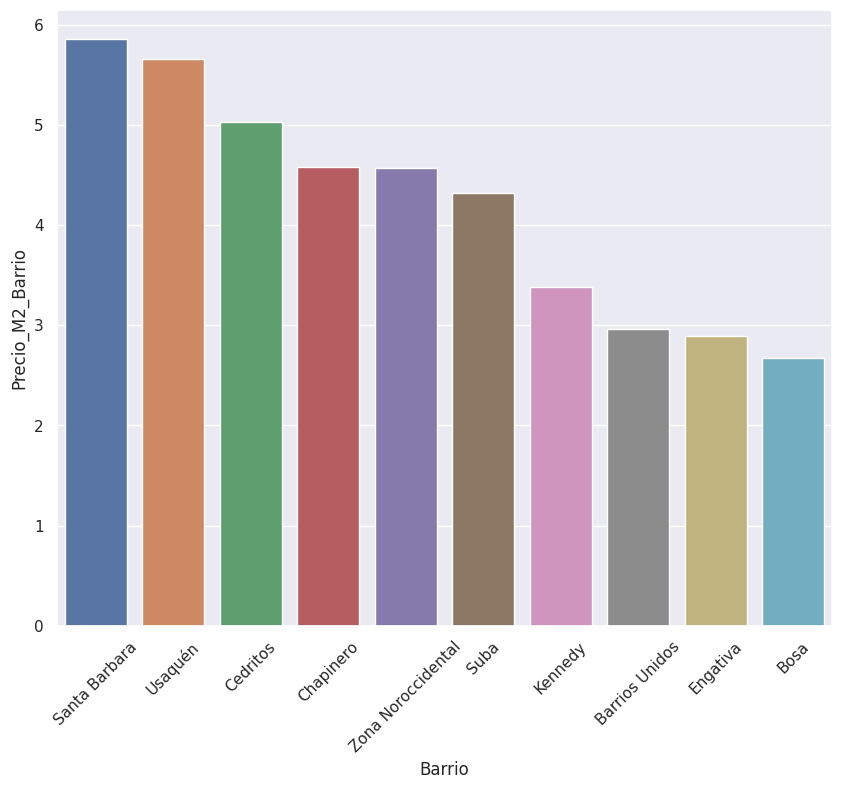

In [320]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=sum_barrio.query('Barrio in @top_barrios'), x='Barrio',
                 y='Precio_M2_Barrio', order=sum_barrio.query('Barrio in @top_barrios')
                 .sort_values(by='Precio_M2_Barrio', ascending=False)['Barrio'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

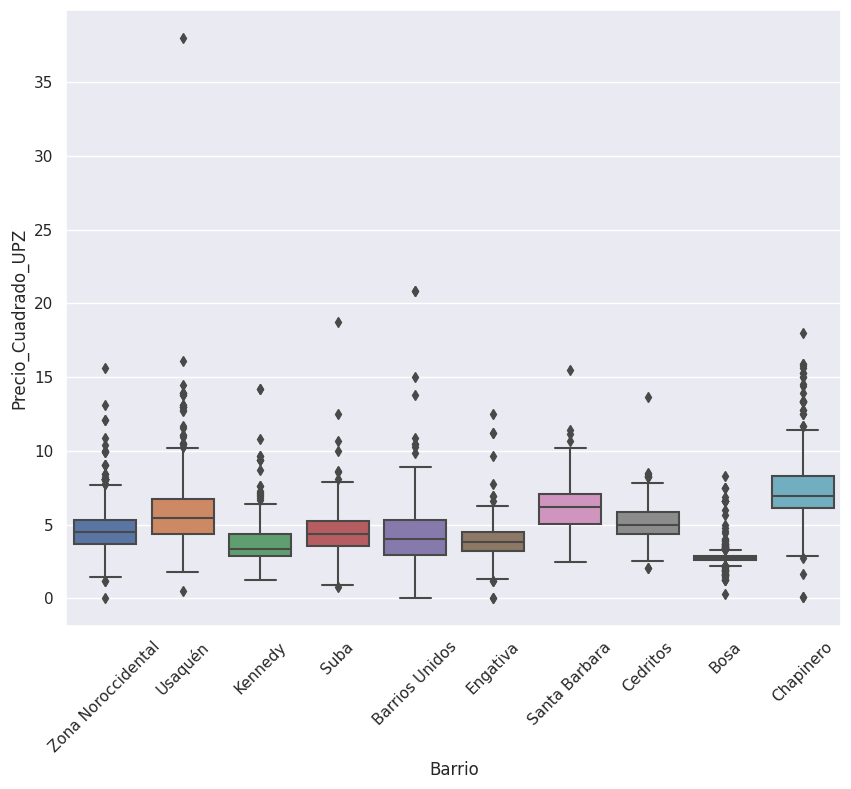

In [321]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Precio_Cuadrado_UPZ", data = viviendas.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)
plt.show()

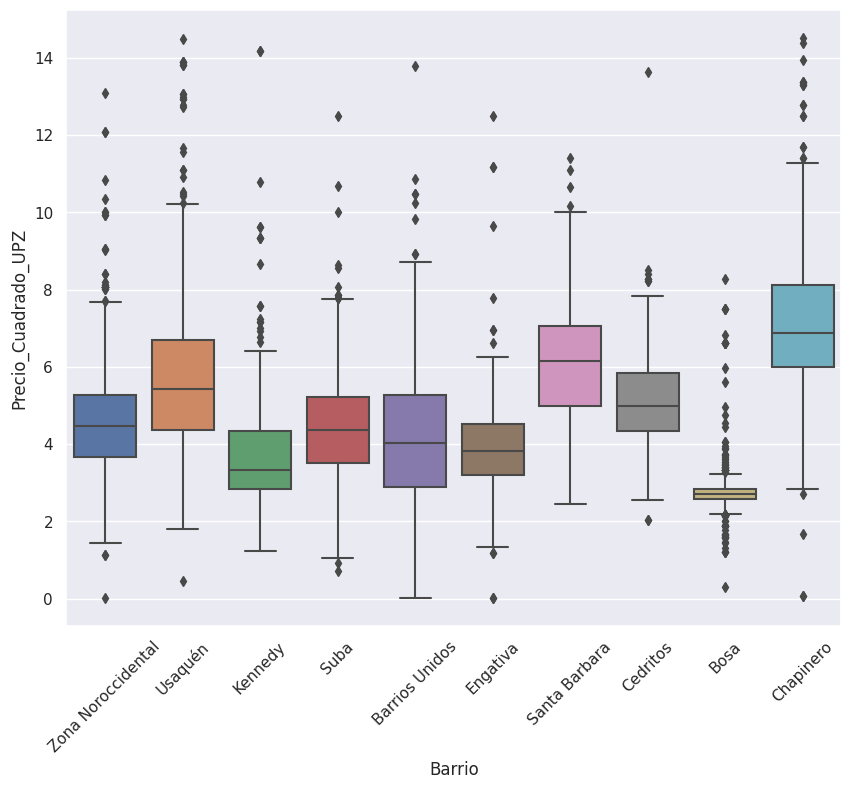

In [322]:
# Valores precio cuadrado UPZ menores de 15 millones
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Precio_Cuadrado_UPZ",
                 data = viviendas.query('Barrio in @top_barrios & Precio_Cuadrado_UPZ < 15'))
ax.tick_params(axis='x', rotation=45)
plt.show()

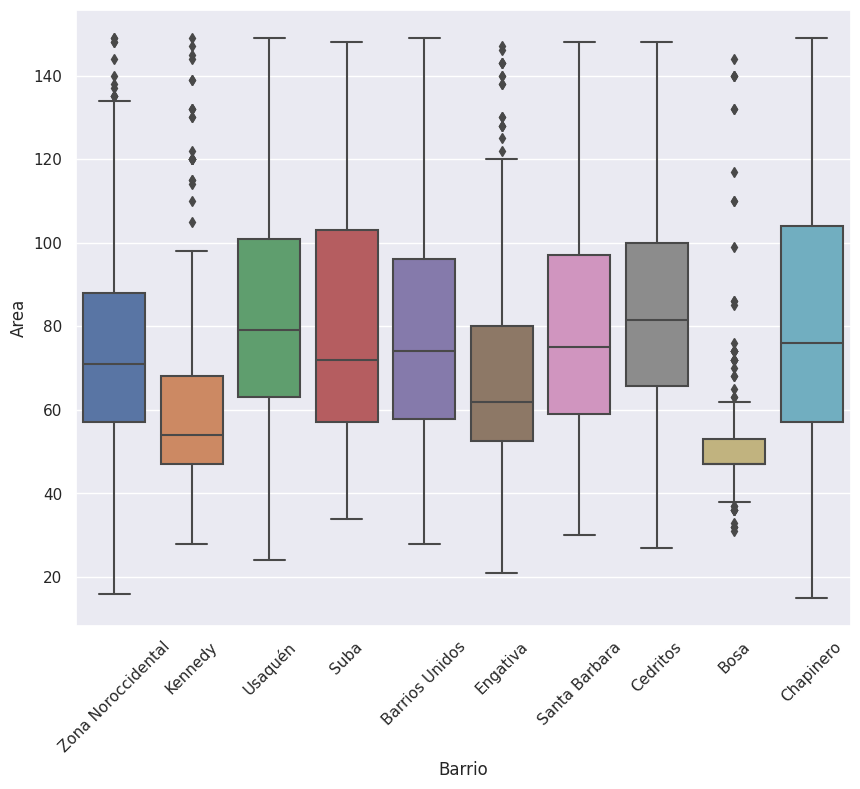

In [323]:
# Valores precio cuadrado UPZ menores de 15 millones
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Area",
                 data = viviendas.query('Barrio in @top_barrios & Area < 150'))
ax.tick_params(axis='x', rotation=45)
plt.show()

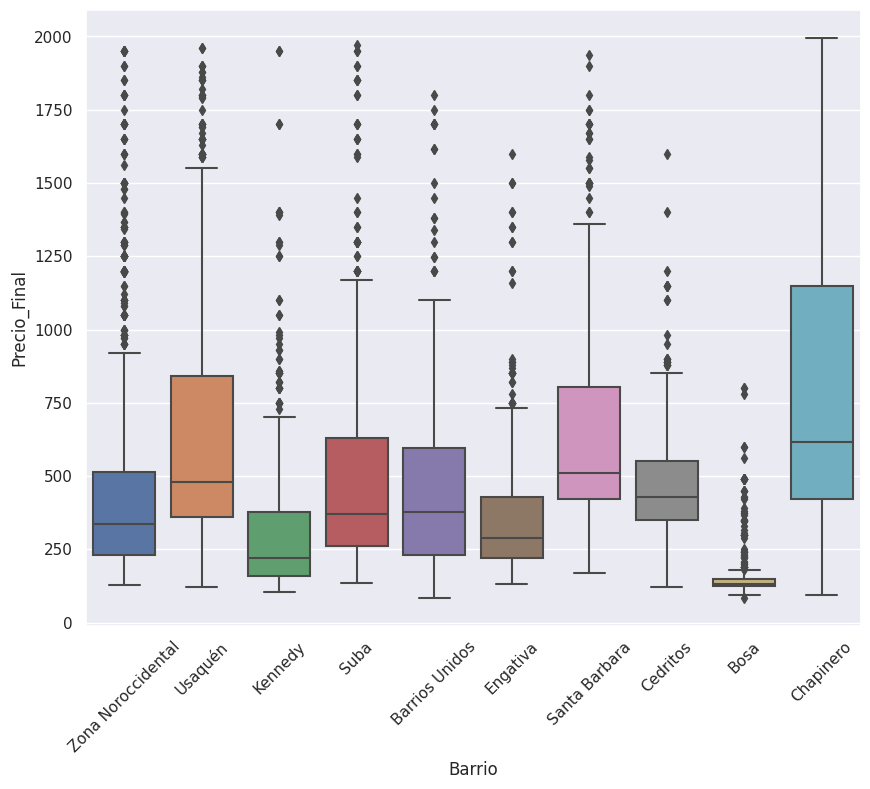

In [324]:
# Valores precio cuadrado UPZ menores de 15 millones
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Precio_Final",
                 data = viviendas.query('Barrio in @top_barrios & Precio_Final < 2000'))
ax.tick_params(axis='x', rotation=45)
plt.show()

Chapinero es uno de los barrios con mayor precio en inmuebles, mayor área también.

## DANE (Departamento Administrativo Nacional Estadístico)(Influencia Socio-Económica)

In [333]:
# Se extraen los 2 primeros DT desde Github, los demás desde Google Drive por su tamaño
DANE_a = pd.read_csv('https://raw.githubusercontent.com/avanegasp/DANE_csv/main/Identificaci%E0%B8%82n%20(Cap%E0%B8%81tulo%20A).csv', sep = ';',encoding='latin-1')
DANE_b = pd.read_csv('https://raw.githubusercontent.com/avanegasp/DANE_csv/main/Datos%20de%20la%20vivenda%20y%20su%20entorno%20(Cap%C2%A1tulo%20B).csv', sep = ';',encoding='latin-1')
DANE_c = pd.read_csv('/content/drive/MyDrive/mi_proyecto_unicataluña/Inmuebles Bogotá/archivos-dane/Condiciones habitacionales del hogar (Cap¡tulo C).csv', sep = ';',encoding='latin-1')
DANE_d = pd.read_csv('/content/drive/MyDrive/mi_proyecto_unicataluña/Inmuebles Bogotá/archivos-dane/Composiciขn del hogar y demografกa (Capกtulo E).csv', sep = ';',encoding='latin-1')
DANE_e = pd.read_csv('/content/drive/MyDrive/mi_proyecto_unicataluña/Inmuebles Bogotá/archivos-dane/Composiciขn del hogar y demografกa (Capกtulo E).csv', sep = ';',encoding='latin-1')
DANE_h = pd.read_csv('/content/drive/MyDrive/mi_proyecto_unicataluña/Inmuebles Bogotá/archivos-dane/Educaciขn (Capกtulo H).csv', sep = ';',encoding='latin-1')
DANE_l = pd.read_csv('/content/drive/MyDrive/mi_proyecto_unicataluña/Inmuebles Bogotá/archivos-dane/Percepciขn sobre las condiciones de vida y el desempeคo institucional (Capกtulo L).csv', sep = ';',encoding='latin-1')
DANE_k = pd.read_csv('/content/drive/MyDrive/mi_proyecto_unicataluña/Inmuebles Bogotá/archivos-dane/Fuerza de trabajo (Cap¡tulo K).csv', sep = ';',encoding='latin-1')

<ipython-input-333-a3f78972ad9e>:3: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  DANE_c = pd.read_csv('/content/drive/MyDrive/mi_proyecto_unicataluña/Inmuebles Bogotá/archivos-dane/Condiciones habitacionales del hogar (Cap¡tulo C).csv', sep = ';',encoding='latin-1')
<ipython-input-333-a3f78972ad9e>:4: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  DANE_d = pd.read_csv('/content/drive/MyDrive/mi_proyecto_unicataluña/Inmuebles Bogotá/archivos-dane/Composiciขn del hogar y demografกa (Capกtulo E).csv', sep = ';',encoding='latin-1')
<ipython-input-333-a3f78972ad9e>:5: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  DANE_e = pd.read_csv('/content/drive/MyDrive/mi_proyecto_unicataluña/Inmuebles Bogotá/archivos-dane/Composiciขn del hogar y demografกa (Capกtulo E).csv', sep = ';',encoding='latin-1')
<ipython-input-

In [334]:
DANE_a.shape

(106467, 11)

In [335]:
# El municipio de Bogotá es el 11001, por eso se filtra
DANE_a = DANE_a.loc[DANE_a.MPIO == 11001]
DANE_a.shape

(86504, 11)

### Merge entre tablas Viviendas y DANE

In [340]:
#Se hace merge en las tablas, hacía la izquierda para ir agregandolas y TODAS se unen por la columna 'DIRECTORIO'
datos_DANE = pd.merge(DANE_a,DANE_b,on='DIRECTORIO', how='left')

In [341]:
datos_DANE = pd.merge(datos_DANE,DANE_c,on='DIRECTORIO', how='left')

In [342]:
datos_DANE = pd.merge(datos_DANE,DANE_e,on='DIRECTORIO', how='left')

<ipython-input-342-99af962437ad>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_DANE = pd.merge(datos_DANE,DANE_e,on='DIRECTORIO', how='left')


In [344]:
datos_DANE.shape

(238559, 281)

In [345]:
datos_DANE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB


### Arreglo de DATASET DANE

In [348]:
final_dane = pd.read_csv('https://raw.githubusercontent.com/avanegasp/Datos_DANE_csv_Final/main/datos_dane.csv')
final_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.0,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.0
1,3004369.0,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.0
2,3004375.0,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.0,NaN,11.0
3,3004380.0,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.0
4,3004383.0,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.0


In [350]:
final_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


In [352]:
#Se hace un diccionario y se renombran las columnas (https://microdatos.dane.gov.co/index.php/catalog/743/data-dictionary/F54?file_name=Identificaci%C3%B3n%20(Cap%C3%ADtulo%20A))
dicc_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO',
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES',
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES',
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA',
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19',
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA',
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO',
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA',
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO',
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO',
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

final_dane = final_dane.rename(columns=dicc_dane)
final_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [353]:
final_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [354]:
final_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.893333,1.186667,1.853333,1.893333,1.560000,1.840000,1.493860e+06,1.160000,1.920000,1.680000,1.800000
Américas,1.383178,1.252336,1.981308,1.785047,1.607477,1.915888,2.672138e+06,1.056075,1.971963,1.719626,1.850467
Apogeo,1.650794,1.301587,1.746032,1.936508,1.682540,2.000000,1.837583e+06,1.079365,1.920635,1.650794,1.920635
Arborizadora,1.430108,1.301075,1.946237,1.881720,1.688172,1.838710,1.802297e+06,1.032258,1.881720,1.612903,1.817204
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.367347,1.326531,1.989796,1.979592,1.704082,1.867347,2.943731e+06,1.051020,1.948980,1.704082,1.938776


In [357]:
# El 2 es NO el 0 es SI
datos = final_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)

In [358]:
datos.sample(2)

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
9402,CHAPINERO: Chicó Lago + El Refugio,0,0,0,0,0,0,12510000.0,1.0,0,0,0
4585,Quinta Paredes,1,0,0,0,1,0,7500000.0,1.0,0,0,1


In [359]:
datos.NOMBRE_ESTRATO.value_counts

<bound method IndexOpsMixin.value_counts of 0       USAQUÉN: Paseo de Los Libertadores + La Uribe
1                                             Usaquén
2                  CHAPINERO: Pardo Rubio + Chapinero
3                                          Los Cedros
4                           Ciudad Salitre Occidental
                            ...                      
9852           SANTA FE: Las Nieves + Sagrado Corazón
9853           SANTA FE: Las Nieves + Sagrado Corazón
9854           SANTA FE: Las Nieves + Sagrado Corazón
9855           SANTA FE: Las Nieves + Sagrado Corazón
9856                                     Santa Isabel
Name: NOMBRE_ESTRATO, Length: 9857, dtype: object>

In [360]:
datos.loc[datos.NOMBRE_ESTRATO == '20 de Julio']

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
513,20 de Julio,0,0,0,0,1,0,98.0,1.0,0,1,0
706,20 de Julio,0,1,0,0,1,0,908000.0,1.0,0,0,1
707,20 de Julio,0,1,0,0,1,0,1800000.0,1.0,0,0,0
708,20 de Julio,0,1,0,0,1,0,1200000.0,1.0,0,0,0
709,20 de Julio,0,1,0,1,1,0,2000000.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,20 de Julio,0,1,0,0,0,1,400000.0,1.0,1,1,1
8751,20 de Julio,0,0,0,0,0,0,906000.0,1.0,0,0,1
8752,20 de Julio,0,1,0,0,0,1,1200000.0,1.0,0,0,0
8783,20 de Julio,0,1,1,0,0,0,1200000.0,1.0,0,0,1


In [361]:
#porcentaje
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.106667,0.813333,0.146667,0.106667,0.440000,0.160000,1.493860e+06,0.840000,0.080000,0.320000,0.200000
Américas,0.616822,0.747664,0.018692,0.214953,0.392523,0.084112,2.672138e+06,0.943925,0.028037,0.280374,0.149533
Apogeo,0.349206,0.698413,0.253968,0.063492,0.317460,0.000000,1.837583e+06,0.920635,0.079365,0.349206,0.079365
Arborizadora,0.569892,0.698925,0.053763,0.118280,0.311828,0.161290,1.802297e+06,0.967742,0.118280,0.387097,0.182796
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.632653,0.673469,0.010204,0.020408,0.295918,0.132653,2.943731e+06,0.948980,0.051020,0.295918,0.061224
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.897436,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
Venecia,0.472222,0.819444,0.236111,0.291667,0.500000,0.361111,2.078713e+06,0.833333,0.138889,0.402778,0.250000
Verbenal,0.771429,0.561905,0.076190,0.028571,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714


In [362]:
#Merge con DT viviendas
pd.merge(viviendas,datos_tratados,left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.518519,0.014815,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.580645,0.118280,0.107527,0.344086,0.129032,2.794784e+06,0.935484,0.086022,0.301075,0.182796
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.223810,0.000000,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,0.418301,0.000000,0.019608,0.274510,0.006536,4.832843e+06,0.960784,0.019608,0.163399,0.091503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,0.614286,0.028571,0.171429,0.428571,0.085714,2.144186e+06,0.914286,0.071429,0.257143,0.185714
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,0.492537,0.022388,0.149254,0.417910,0.089552,4.177179e+06,0.925373,0.022388,0.119403,0.067164
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,0.706897,0.034483,0.172414,0.465517,0.258621,2.356995e+06,0.896552,0.051724,0.224138,0.206897
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,0.869565,0.021739,0.108696,0.543478,0.130435,1.418653e+06,0.847826,0.021739,0.391304,0.065217


## ML

In [372]:
datos_ML = pd.merge(viviendas,datos_tratados,left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
datos_ML

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.518519,0.014815,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.580645,0.118280,0.107527,0.344086,0.129032,2.794784e+06,0.935484,0.086022,0.301075,0.182796
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.223810,0.000000,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,0.418301,0.000000,0.019608,0.274510,0.006536,4.832843e+06,0.960784,0.019608,0.163399,0.091503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,0.614286,0.028571,0.171429,0.428571,0.085714,2.144186e+06,0.914286,0.071429,0.257143,0.185714
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,0.492537,0.022388,0.149254,0.417910,0.089552,4.177179e+06,0.925373,0.022388,0.119403,0.067164
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,0.706897,0.034483,0.172414,0.465517,0.258621,2.356995e+06,0.896552,0.051724,0.224138,0.206897
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,0.869565,0.021739,0.108696,0.543478,0.130435,1.418653e+06,0.847826,0.021739,0.391304,0.065217


In [365]:
datos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Banos                     9520 non-null   int64  
 4   Area                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   Pesos                     9520 non-null   object 
 9   Precio                    9520 non-null   object 
 10  Precio_Final              9520 non-null   float64
 11  Precio_Cuadrado_UPZ       9520 non-null   float64
 12  Precio_Cuadrado_Barrio    9520 non-null   float64
 13  CONJUNTO_CERRADO          9366 non-null   float64
 14  INSEGURI

In [368]:
# La UPZ está como objeto pero al trabajar con una regresión lineal debe pasarse a númerico para alimentar el modelo
# Por eso se trae el código de la UPZ

cod_upz = pd.read_csv('https://raw.githubusercontent.com/avanegasp/Datos_DANE_csv_Final/main/cod_upz.csv')
cod_upz.head()

,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,SANTA FE: Las Nieves + Sagrado Corazón,814.0
1,Santa Isabel,37.0
2,USAQUÉN: Country Club + Santa Bárbara,803.0
3,CHAPINERO: Pardo Rubio + Chapinero,816.0
4,Ciudad Salitre Occidental,110.0


In [373]:
#Se hace merge de las 2 columnas con las que vamos a relacionarlos
#El inner join es porque trae los datos que están en ambas tablas (escritos igual)
datos_ML = pd.merge(datos_ML,cod_upz, left_on='UPZ',right_on='NOMBRE_ESTRATO', how='inner')
datos_ML.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.22963,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0


El inner join hace es la intersección de los datos que se tienen en común en ambas bases, ya que recordemos que acá tenemos 2 bases de datos unidas por un inner join.
La segunda base de datos posiblemente no tenía algunos barrios que la primera sí, por eso se eliminaron datos y aunque se aumentaron el número de columnas, las filas aumentaron muy poco al DT 'viviendas' y se queda sin datos nulos por la misma unión.

Todo esto para que nuestro identificador sea 'COD_UPZ_GRUPO'

In [375]:
#No se perdió mucha data, se agregaron columnas pero estos merge colocaron los datos que coincidian
datos_ML.shape

(9318, 26)

In [377]:
#Con el primer DT del ejemplo
viviendas.shape

(9520, 13)

In [376]:
datos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Pesos                     9318 non-null   object 
 9   Precio                    9318 non-null   object 
 10  Precio_Final              9318 non-null   float64
 11  Precio_Cuadrado_UPZ       9318 non-null   float64
 12  Precio_Cuadrado_Barrio    9318 non-null   float64
 13  CONJUNTO_CERRADO          9318 non-null   float64
 14  INSEGURI

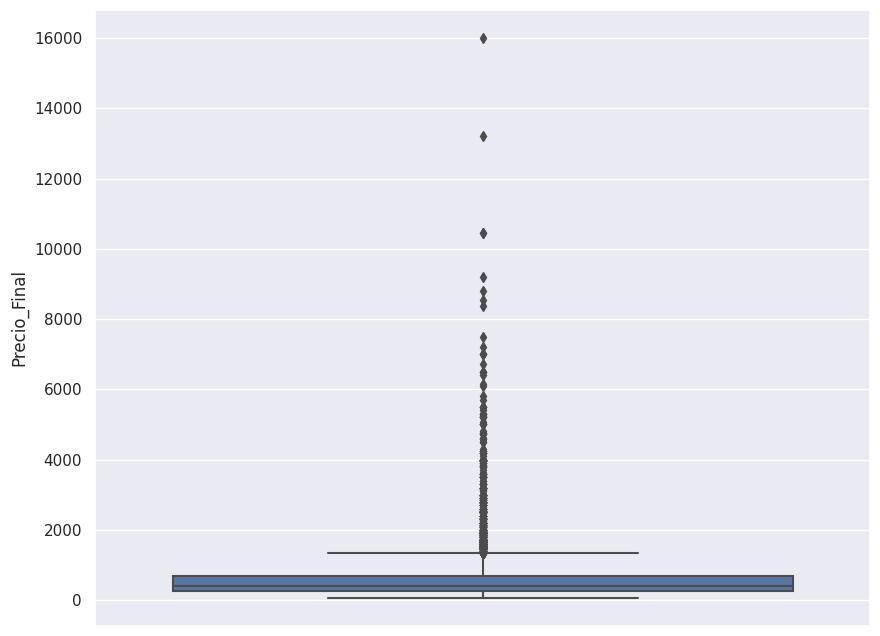

In [378]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ML, y='Precio_Final')
plt.show()

Para ML se ajustó este Precio_Final, porque las pruebas están pésimas, así que se quiere ajustar mejor el modelo

In [380]:
datos_ML.query('Precio_Final > 5000 | Precio_Final < 60')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
207,Apartamento,Apartamento en venta en Chapinero,3,5,476,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 8.550.000.000,$,8550000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
323,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.800.000.000,$,5800000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
702,Casa,Casa en venta en Chapinero,4,4,462,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.200.000.000,$,5200000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
708,Casa,Casa en venta en Chapinero,12,2,769,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 6.160.000.000,$,6160000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
829,Apartamento,Apartamento en venta en Zona Noroccidental,4,7,550,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 7.200.000.000,$,7200000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
1371,Apartamento,Apartamento en venta en El Chicó,4,5,555,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 6.100.000.000,$,6100000000,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1414,Apartamento,Apartamento en venta en El Chicó,3,5,1550,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 13.200.000.000,$,13200000000,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1429,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1442,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1518,Apartamento,Apartamento en venta en Chico Reservado,4,5,378,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 6.500.000.000,$,6500000000,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0


In [447]:
datos_ML = datos_ML.query('Precio_Final < 1000 & Precio_Final > 60')

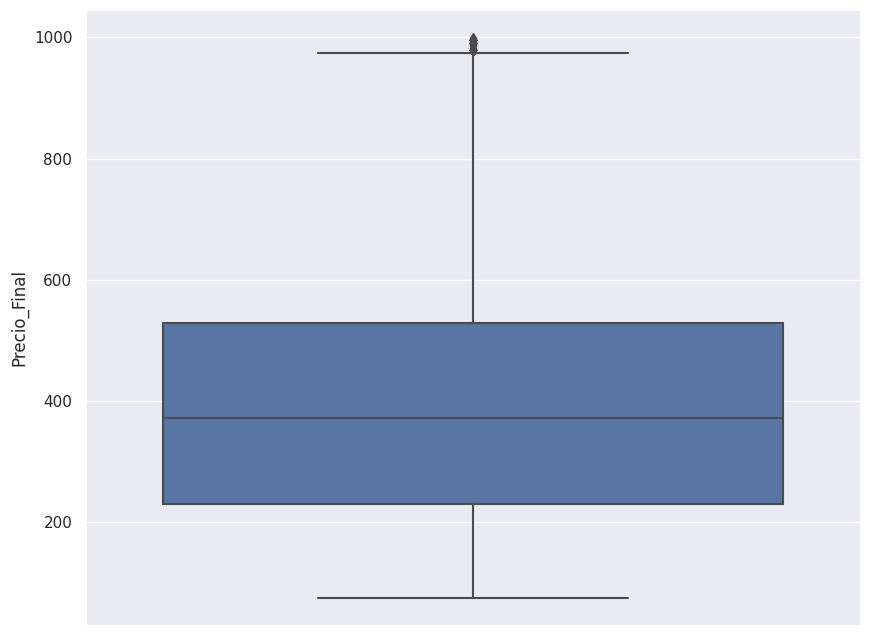

In [448]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ML, y='Precio_Final')
plt.show()

In [449]:
#Se crea una nueva columna con el salario anual
datos_ML['Salario_Anual_Mill'] = datos_ML['SALARIO_MES']*12/1000000
datos_ML['Salario_Anual_Mill']

0       48.417456
1       48.417456
3       48.417456
9       48.417456
10      48.417456
          ...    
9313    29.344838
9314    29.344838
9315    29.344838
9316    29.344838
9317    29.344838
Name: Salario_Anual_Mill, Length: 8053, dtype: float64

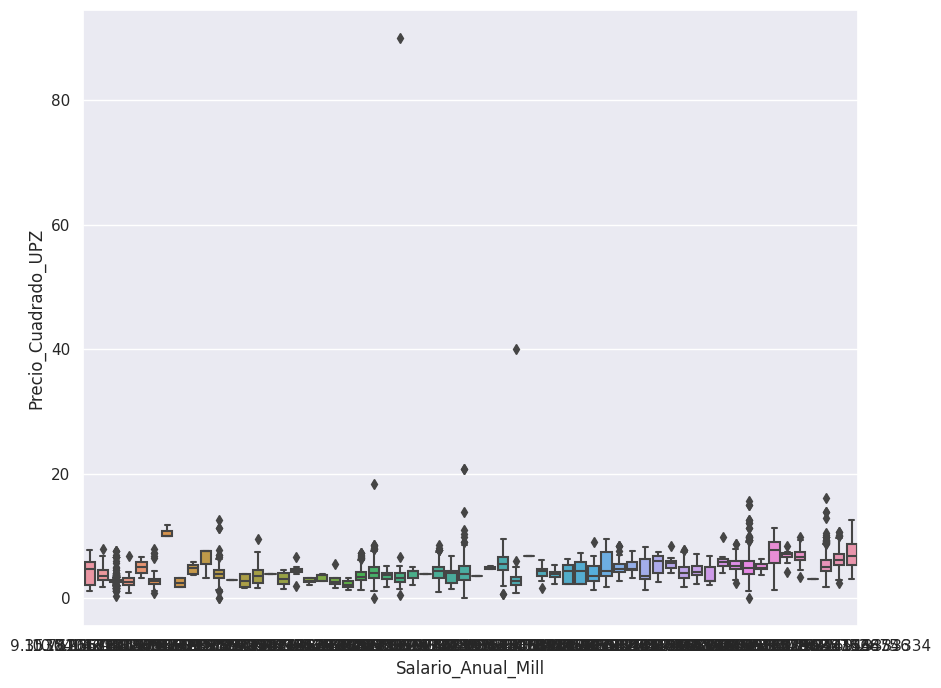

In [450]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ML, x='Salario_Anual_Mill', y='Precio_Cuadrado_UPZ')
plt.show()

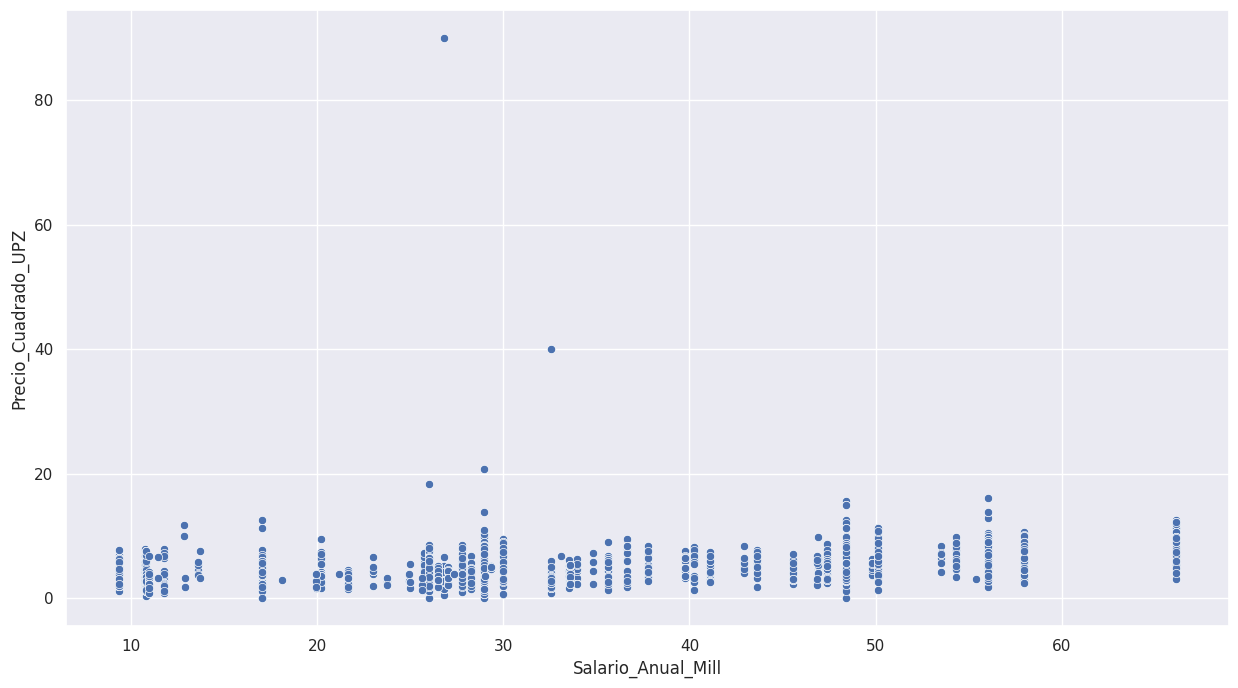

In [451]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=datos_ML, x='Salario_Anual_Mill', y='Precio_Cuadrado_UPZ')
plt.show()

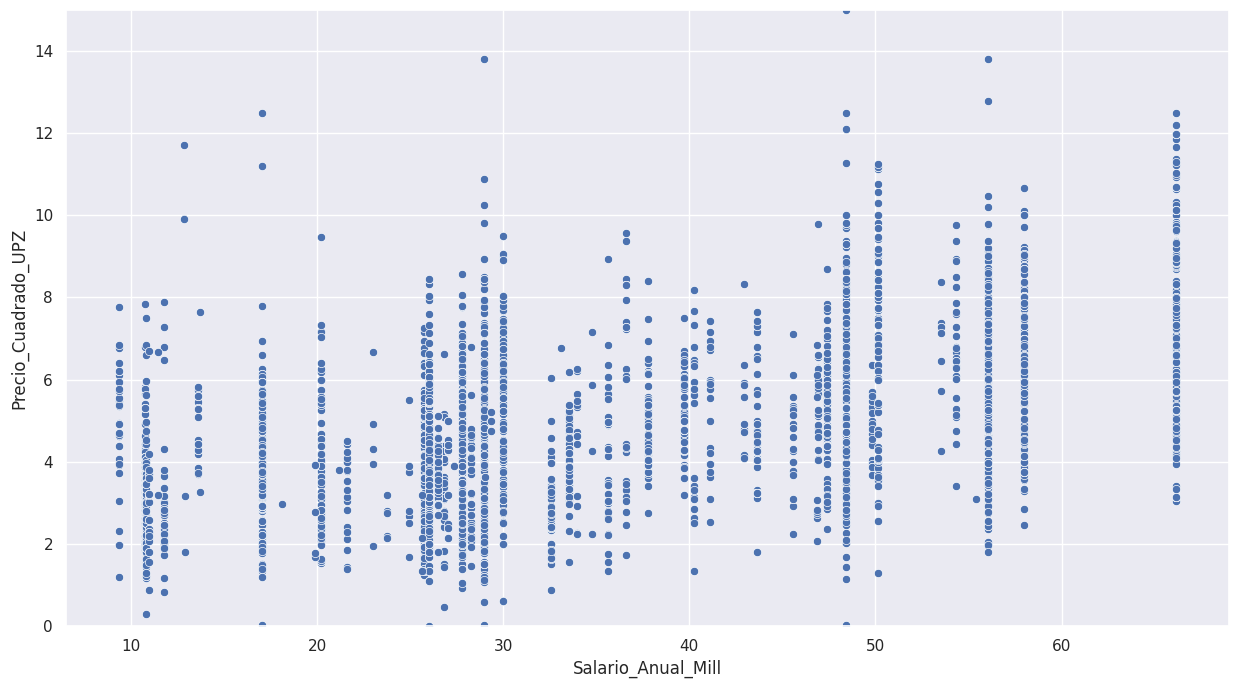

In [452]:
#Se limita a 15 millones en el eje y
plt.figure(figsize=(15,8))
sns.scatterplot(data=datos_ML, x='Salario_Anual_Mill', y='Precio_Cuadrado_UPZ')
plt.ylim(0,15)
plt.show()

No se ve relación aparente entre el salario anual y el precio del M2 en la UPZ

## Mapa de correlación en ML

In [453]:
#Se puede detallar que hay una correlación del 46% entre el salario anual y el precio cuadrado UPZ, pero si vemos en
#Precio cuadrado barrio hay un 81% de correlación
datos_ML.corr()

<ipython-input-453-4b53755dc852>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_ML.corr()


,Habitaciones,Banos,Area,Precio_Final,Precio_Cuadrado_UPZ,Precio_Cuadrado_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,Salario_Anual_Mill
Habitaciones,1.000000,0.439876,0.023878,0.179617,-0.305691,-0.208500,-0.118321,0.132694,0.082855,0.104958,0.141488,0.116696,-0.176395,-0.078920,0.069860,0.133009,0.095385,-0.124029,-0.176395
Banos,0.439876,1.000000,0.034147,0.657260,-0.044680,0.118420,0.153377,-0.184499,-0.165690,-0.114617,-0.162111,-0.208465,0.170148,0.123761,-0.087821,-0.145903,-0.074149,0.002206,0.170148
Area,0.023878,0.034147,1.000000,0.043812,-0.037175,-0.036190,-0.008738,-0.003657,-0.009034,-0.009265,-0.001735,0.009169,-0.008906,-0.005909,0.017292,0.008029,0.012512,-0.008595,-0.008906
Precio_Final,0.179617,0.657260,0.043812,1.000000,0.349010,0.405937,0.323921,-0.378127,-0.296040,-0.236809,-0.351884,-0.389696,0.422351,0.220793,-0.176238,-0.329449,-0.181582,0.153047,0.422351
Precio_Cuadrado_UPZ,-0.305691,-0.044680,-0.037175,0.349010,1.000000,0.482254,0.324966,-0.364626,-0.291422,-0.218152,-0.360610,-0.350344,0.453114,0.234790,-0.199850,-0.355868,-0.207946,0.248816,0.453114
Precio_Cuadrado_Barrio,-0.208500,0.118420,-0.036190,0.405937,0.482254,1.000000,0.655434,-0.663099,-0.379640,-0.408684,-0.663303,-0.596255,0.821258,0.421697,-0.317591,-0.651843,-0.221821,0.408670,0.821258
CONJUNTO_CERRADO,-0.118321,0.153377,-0.008738,0.323921,0.324966,0.655434,1.000000,-0.844035,-0.305918,-0.502800,-0.700105,-0.663725,0.808633,0.614359,-0.343507,-0.784273,0.059716,0.084434,0.808633
INSEGURIDAD,0.132694,-0.184499,-0.003657,-0.378127,-0.364626,-0.663099,-0.844035,1.000000,0.515324,0.602888,0.846759,0.746067,-0.815927,-0.564471,0.292099,0.740927,0.082807,0.002847,-0.815927
TERMINALES_BUS,0.082855,-0.165690,-0.009034,-0.296040,-0.291422,-0.379640,-0.305918,0.515324,1.000000,0.398179,0.678017,0.580315,-0.517424,-0.310267,0.178414,0.367101,0.258426,-0.093898,-0.517424
BARES_DISCO,0.104958,-0.114617,-0.009265,-0.236809,-0.218152,-0.408684,-0.502800,0.602888,0.398179,1.000000,0.602818,0.489357,-0.379855,-0.255185,-0.019914,0.322648,-0.055018,0.266519,-0.379855


### Matriz de correlación

<ipython-input-454-b8c035d3edd9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(datos_ML.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


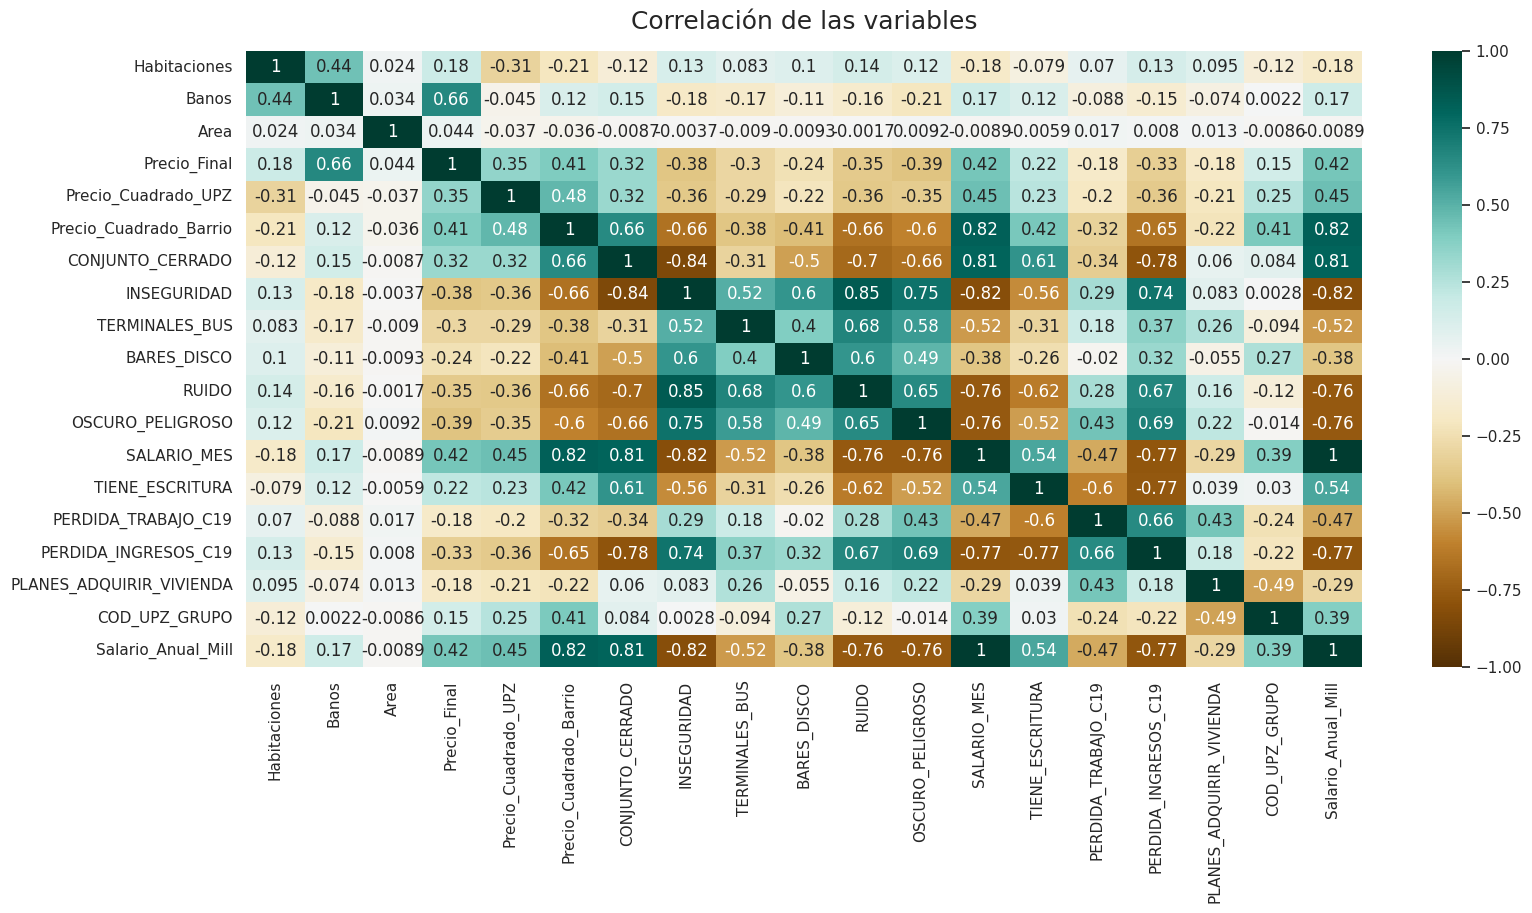

In [454]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ML.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

## Aprendizaje Supervisado - Regresión líneal

In [455]:
from sklearn.linear_model import LinearRegression

#Separación de los datos de prueba y entrenamiento
from sklearn.model_selection import train_test_split


In [456]:
#Se quiere predecir los precios

#Se hace una Baseline(NO interesa que no sea nuestro objetivo, es para ir mirando)

X = datos_ML[['COD_UPZ_GRUPO']]
y = datos_ML['Precio_Final']

#Test_size quiere decir que el modelo entrenará con el 70% de mis datos y pruebe con el 30%
#random_state = Es un modelo probabilístico, cada vez ejecute con datos aleatorios, es una semilla
#con un random state de 99

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=99)

In [457]:
#Corresponde al 70% de los datos
X_train

,COD_UPZ_GRUPO
6314,74.0
9047,18.0
774,816.0
4905,47.0
34,816.0
...,...
2264,14.0
4082,803.0
6385,74.0
8394,809.0


In [458]:
#Corresponde al 30% de los datos
X_test

,COD_UPZ_GRUPO
4326,803.0
4598,47.0
5810,21.0
7101,94.0
950,816.0
...,...
5087,101.0
9143,18.0
3665,803.0
8691,814.0


In [459]:
#Son los mismos datos que X_train
y_train

6314    220.0
9047    390.0
774     345.0
4905    285.0
34      350.0
        ...  
2264    350.0
4082    800.0
6385    290.5
8394    400.0
5770    289.0
Name: Precio_Final, Length: 5637, dtype: float64

In [460]:
#Son los mismos datos que Y_train
y_test

4326    799.0
4598    510.0
5810    415.0
7101    300.0
950     400.0
        ...  
5087    528.0
9143    479.0
3665    491.0
8691    820.0
7585    800.0
Name: Precio_Final, Length: 2416, dtype: float64

In [461]:
#Se instancia un modelo lineal de forma genérica
modelo = LinearRegression()

In [462]:
#Se ajusta el modelo (El modelo ya está entrenado)
modelo.fit(X_train,y_train)

LinearRegression()

In [463]:
#Validar el modelo
#El predice con mis datos del modelo de prueba para que prediga Y,
#y luego se comparan con los datos reales que son y_train para ver la eficacia del modelo

#Se almacena el resultado en y_predict_test
y_predict_test = modelo.predict(X_test)

In [440]:
#Validación del modelo (sin ajustar)
#Aplicación de error absoluto medio
#Coeficiente de determinación al cuadrado varia entre 0 a 1, que se ajuste más cercano a 1

from sklearn.metrics import mean_absolute_error, r2_score

baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_mae

353.3887119607374

La respuesta del error absoluto medios es que sinintroducimos el valor un inmueble nos va a dar una variabilidad de 353 millones de pesos, lo cual es demasiado.

In [464]:
#Validación del modelo (ajustando)
#Aplicación de error absoluto medio
#Coeficiente de determinación al cuadrado varia entre 0 a 1, que se ajuste más cercano a 1

from sklearn.metrics import mean_absolute_error, r2_score

baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_mae

176.8244965199267

In [441]:
#Instanciamos (sin ajustar)
baseline_r2 = r2_score(y_test, y_predict_test)
baseline_r2

0.02988758289093174

La respuesta es 0.02, muy cercano a 0 o sea que nuestro modelo no se esta desempeñando nada bien

In [465]:
#Instanciamos (ajustando)
baseline_r2 = r2_score(y_test, y_predict_test)
baseline_r2

0.019169699187270073

Se continua con el experimento, pero esta vez seleccionando 2 variables nuevas 'Habitaciones y Baños'

In [442]:
#Sin ajustar
X = datos_ML[['COD_UPZ_GRUPO','Habitaciones','Banos']]

y = datos_ML["Precio_Final"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

241.7714514560005 0.39346598615451067
243.29145256483525 0.47023870196651907


Mejoró estos son los datos de prueba (241.7714514560005 0.39346598615451067)

Estos son los datos que ya conoce, porque son los de entrenamiento (243.29145256483525 0.47023870196651907)

In [466]:
#Ajustando
X = datos_ML[['COD_UPZ_GRUPO','Habitaciones','Banos']]

y = datos_ML["Precio_Final"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

122.48786088529499 0.3347997677700183
120.33693503554464 0.4780647890660492


Se agregan más variables al modelo

In [467]:
X = datos_ML[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','Salario_Anual_Mill','TIENE_ESCRITURA']]

y = datos_ML["Precio_Final"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

110.68824338918562 0.5276195350719468
110.74668679144956 0.5325974420173687


In [469]:
#Parámetros
#Para saber cuánto valdría un inmueble con las siguientes características

#UPZ = 816, #Habitaciones = 3, , Banos=2 , CONJUNTO_CERRADO = 1(SI), Salario_Anual_Mill=50 millones, TIENE_ESCRITURA=1(SI)

#Cuánto valdría un inmueble

modelo_1.predict([[816,3,2,1,50,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([407.81059021])